In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
np.random.seed(0)
#%pylab tk #pour avoir les plots dans une nouvelle fenetre

In [2]:
def f_target(x):
    return 2 * x * np.sin(x)


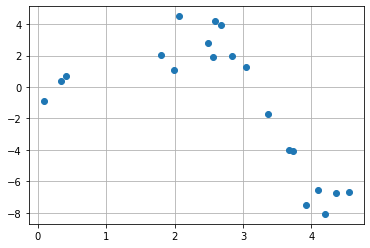

In [3]:
N = 20 #nombre d'exemples du jeu de données
a = 0 #début de l'intervalle des x
b = 3*np.pi/2 #fin de l'intervalle des x
Xs = (b-a) * np.random.rand(N) + a
Ys = [f_target(x) + np.random.randn() for x in Xs]
plt.plot(Xs,Ys, 'o') #plot des points generes
plt.grid()

In [4]:
#Question 1:
def flin(x, theta1, theta0):
    return theta1*x + theta0

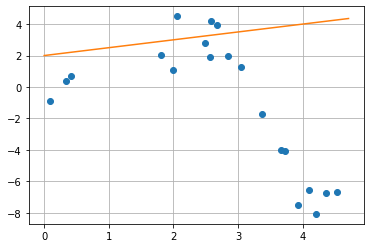

In [5]:
#Question 2:
theta1 = 0.5
theta0 = 2

nbpts = 40
xspace = np.linspace(a, b, nbpts)

plt.plot(Xs,Ys, 'o')
plt.plot(xspace, [flin(x, theta1, theta0) for x in xspace])
plt.grid()

In [6]:
#Question 3:
def erreur_quad(f, Xs, Ys):
    s = 0
    for i in range(len(Xs)):
        s += (f(Xs[i]) - Ys[i])**2
    return s / len(Xs)

ftest = lambda x : flin(x, theta1, theta0)
erreur_quad(ftest, Xs, Ys)

40.83416973976079

In [7]:
#Question 4:
theta1 = -1
theta0 = 2

ftest = lambda x : flin(x, theta1, theta0)
erreur_quad(ftest, Xs, Ys)

12.179063480576541

theta_1:  -2.034835472398463 , theta_2:  4.507025401607631 , erreur quadratique moyenne:  10.260445732516947


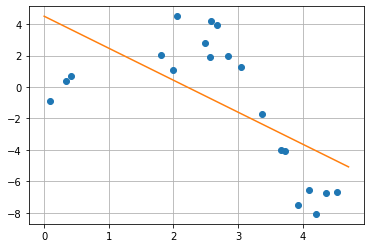

In [8]:
#Question 5:
xbar = np.mean(Xs)
ybar = np.mean(Ys)

theta1opt = np.sum([(Xs[i] - xbar) * (Ys[i] - ybar) for i in range(len(Xs))])
theta1opt /= np.sum([(x - xbar)**2 for x in Xs])
theta0opt = ybar - theta1opt * xbar

ftest = lambda x : flin(x, theta1opt, theta0opt)
e = erreur_quad(ftest, Xs, Ys)

print("theta_1: ", theta1opt, ', theta_2: ', theta0opt, 
      ', erreur quadratique moyenne: ', e)
plt.plot(Xs, Ys, 'o')
plt.plot(xspace, [flin(x, theta1opt, theta0opt) for x in xspace])
plt.grid()

In [9]:
#Question 6:
def fpoly(x, theta):
    '''fonction qui calcule l'image de x par le polynôme de paramètre theta, 
    dont les éléments correspondent aux coefficients du polynôme triés
    par ordre décroissant de degré.'''
    s = 0
    xpow = 1
    for i in range(len(theta)):
        s += theta[-1-i] * xpow
        xpow *= x
    return s
        
def plot_poly(theta, a, b, label=""):
    '''Trace la courbe du polynôme de paramètre theta entre a et b.'''
    xspace = np.linspace(a, b, 40)
    plt.plot(xspace, [fpoly(x, theta) for x in xspace], label=label)

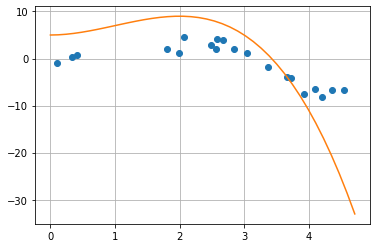

In [10]:
plt.plot(Xs, Ys, 'o')
plot_poly([-1,3,0,5], a, b)
plt.grid()

Degré  2 , erreur quadratique moyenne:  2.099429067826882
Degré  5 , erreur quadratique moyenne:  0.6733207813808548
Degré  10 , erreur quadratique moyenne:  0.6001183458769973
Degré  20 , erreur quadratique moyenne:  0.13915945536679483


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


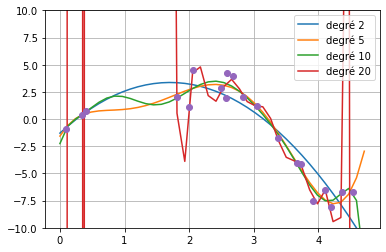

In [11]:
#Question 7:
degs = [2,5,10,20]
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
    plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  2 , erreur quadratique moyenne:  2.099429067826882


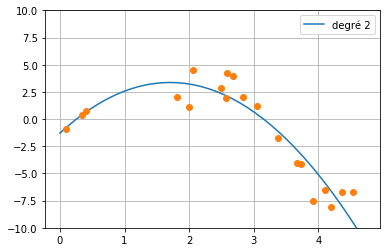

In [12]:
#Question 7:
d = 2
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  5 , erreur quadratique moyenne:  0.6733207813808548


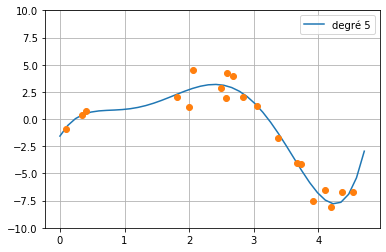

In [13]:
#Question 7:
d = 5
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  10 , erreur quadratique moyenne:  0.6001183458769973


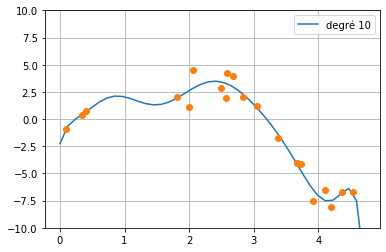

In [14]:
#Question 7:
d = 10
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

Degré  20 , erreur quadratique moyenne:  0.13915945536679483


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


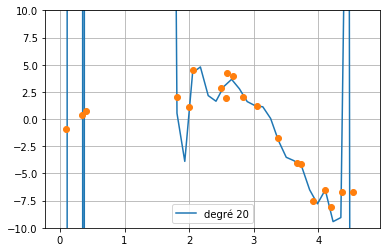

In [15]:
#Question 7:
d = 20
theta = np.polyfit(Xs,Ys,d)
ftest = lambda x : fpoly(x, theta)
print("Degré ", d, ", erreur quadratique moyenne: ", erreur_quad(ftest, Xs, Ys))
plot_poly(theta, a, b, label ="degré "+str(d))
plt.plot(Xs, Ys, 'o')
plt.ylim(-10,10)
plt.grid()
plt.legend()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


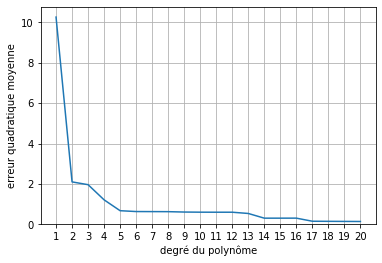

In [16]:
fig, ax = plt.subplots()
degs = np.arange(1,21)
erreurs = []
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    erreurs.append(erreur_quad(ftest, Xs, Ys))
plt.plot(degs, erreurs)
plt.ylim(bottom=0)
ax.xaxis.set_ticks(degs)
plt.xlabel("degré du polynôme")
plt.ylabel("erreur quadratique moyenne")
plt.grid()

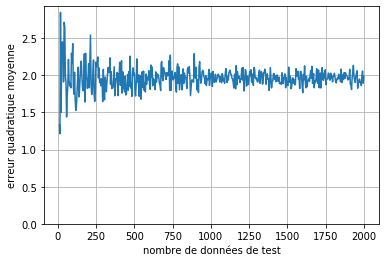

In [17]:
#Question 9:
N2range = np.linspace(10, 2000, 500)
N2range = [int(N2) for N2 in N2range]

#solution pour degré 10:
theta = np.polyfit(Xs,Ys,10)
ftest = lambda x: fpoly(x, theta)

erreurs = []
for N2 in N2range:
    Xstest = (b-a) * np.random.rand(N2) + a
    Ystest = [f_target(x) + np.random.randn() for x in Xstest]
    erreurs.append(erreur_quad(ftest, Xstest, Ystest))
plt.plot(N2range, erreurs)
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données de test")
plt.ylabel("erreur quadratique moyenne")
plt.grid()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


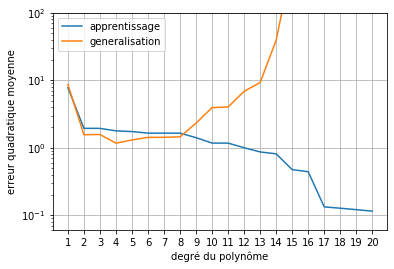

In [18]:
#Question 10:
N = 20 #nombre d'exemples du jeu de données
Xs = (b-a) * np.random.rand(N) + a
Ys = [f_target(x) + np.random.randn() for x in Xs]

fig, ax = plt.subplots()
degs = np.arange(1,21)

N2 = 1000
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for d in degs:
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x : fpoly(x, theta)
    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))
plt.plot(degs, erreurs, label="apprentissage")
plt.semilogy(degs, erreursgeneral, label="generalisation")
plt.ylim(0, 100)
ax.xaxis.set_ticks(degs)
plt.xlabel("degré du polynôme")
plt.ylabel("erreur quadratique moyenne")
plt.grid()
plt.legend()

In [19]:
#Question 11:
d = 12

#Nrange = np.linspace(10, 200, 200)
Nrange = np.arange(10, 250)
Nrange = [int(N) for N in Nrange]

N2 = 200
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for N in Nrange:
    Xs = (b-a) * np.random.rand(N) + a
    Ys = [f_target(x) + np.random.randn() for x in Xs]
    
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x: fpoly(x, theta)

    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


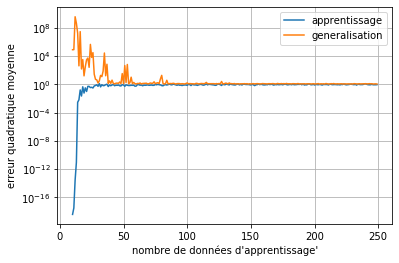

In [20]:
plt.semilogy(Nrange, erreurs, label="apprentissage")
plt.plot(Nrange, erreursgeneral, label="generalisation")
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données d'apprentissage'")
plt.ylabel("erreur quadratique moyenne")
plt.legend()
plt.grid()

In [21]:
#Question 12:

#Nrange = np.linspace(10, 200, 200)
Nrange = np.arange(10, 1000, 10)

N2 = 200
Xstest = (b-a) * np.random.rand(N2) + a
Ystest = [f_target(x) + np.random.randn() for x in Xstest]

erreurs = []
erreursgeneral = []
for N in Nrange:
    d = int(N**0.5) #choix de scaling. On peut en choisir d'autres
    Xs = (b-a) * np.random.rand(N) + a
    Ys = [f_target(x) + np.random.randn() for x in Xs]
    
    theta = np.polyfit(Xs,Ys,d)
    ftest = lambda x: fpoly(x, theta)

    erreurs.append(erreur_quad(ftest, Xs, Ys))
    erreursgeneral.append(erreur_quad(ftest, Xstest, Ystest))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly co

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


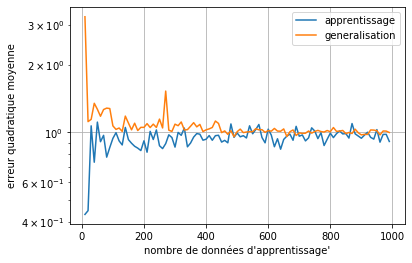

In [22]:
plt.semilogy(Nrange, erreurs, label="apprentissage")
plt.plot(Nrange, erreursgeneral, label="generalisation")
plt.ylim(bottom=0)
ax.xaxis.set_ticks(N2range)
plt.xlabel("nombre de données d'apprentissage'")
plt.ylabel("erreur quadratique moyenne")
plt.legend()
plt.grid()

In [23]:
# TP2 

n = 20

def f(x):
    return 2 * x - 1

Xs = (b-a) * np.random.rand(n) + a
Ys = [f(x) + np.random.randn() for x in Xs]

In [24]:
def g1(theta1, theta0):
    ftest = lambda x : flin(x, theta1, theta0)  
    return erreur_quad(ftest, Xs, Ys)
# a = 0.975
b = 2
nbPoint = 40
maxval = np.inf
tspace1 = np.linspace(-5, 5, nbPoint)
tspace0 = np.linspace(-2, 5, nbPoint)
# Y2s = [g1(t, a) for t in tspace1]
Y3s = [g1(t, b) for t in tspace0]


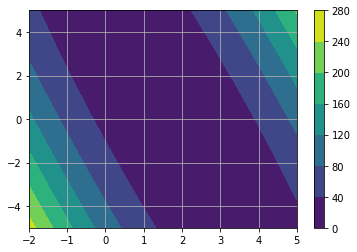

In [25]:
# %pylab nbagg
fig, ax = plt.subplots()

t0, t1 = np.meshgrid(tspace0, tspace1)
Z = [[min(maxval, g1(t0, t1)) for t0 in tspace0]for t1 in tspace1]
contours = plt.contourf(t0, t1, Z)
cbar = fig.colorbar(contours)
plt.grid()

6.047889788212942

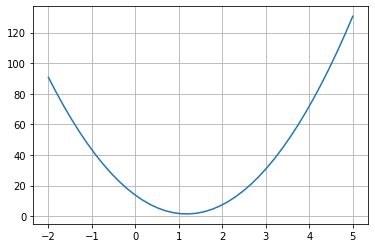

In [26]:
plt.plot(tspace0, Y3s, label="data")
# 
plt.grid()
# 
g1(1, 0)

In [27]:
def grad(theta, xs=Xs, ys=Ys):
    N = len(xs)
    return np.array([2/N * np.sum([xs[k] * (theta[0]*xs[k] + theta[1] - ys[k]) for k in range(N)]),
                     2/N * np.sum([theta[0]*xs[k] + theta[1] - ys[k] for k in range(N)])])

In [28]:
def grad2(theta):
    epsilon = 0.0000001
    return np.array([(g1(theta[0], theta[1]+epsilon)-g1(theta[0], theta[1]))/epsilon, (g1(theta[0]+epsilon, theta[1])-g1(theta[0], theta[1]))/epsilon])

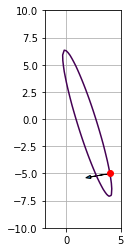

In [29]:
tspace1 = np.linspace(-10, 10, nbPoint)
tspace0 = np.linspace(-2, 5, nbPoint)
t0, t1 = np.meshgrid(tspace0, tspace1)
Z = [[min(maxval, g1(t0, t1)) for t0 in tspace0]for t1 in tspace1]

theta0 = [4, -5]
THEgradient = -grad2(theta0)
THEgradient = THEgradient[::-1] * 0.15
plt.contour(t0, t1, Z, levels = [g1(theta0[0], theta0[1])])
plt.plot(theta0[0], theta0[1], "ro")
plt.gca().set_aspect('equal')
plt.arrow(theta0[0], 
          theta0[1],
          THEgradient[0],
          THEgradient[1],
          head_width=0.3)
plt.grid()

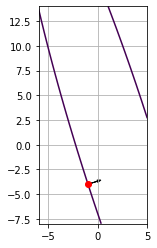

In [30]:
def poly(x, theta):
    '''poly(x, theta): fonction polynome. Pour n = len(theta)-1, renvoi sum_{i=0}^n theta[-i]*x^i.
    theta correspond aux coefficients du polynôme, du plus grand au plus petit degré.'''
    s = 0
    powx = 1
    for i in range(len(theta)):
        s += powx * theta[-1-i]
        powx *= x
    return s

def g(theta, xs=Xs, ys=Ys):
    N = len(xs)
    return 1/N * np.sum([(poly(xs[i], theta) - ys[i])**2 for i in range(N)]) 

def grad(theta, xs=Xs, ys=Ys):
    N = len(xs)
    return np.array([2/N * np.sum([xs[k] * (theta[0]*xs[k] + theta[1] - ys[k]) for k in range(N)]),
                     2/N * np.sum([theta[0]*xs[k] + theta[1] - ys[k] for k in range(N)])])

fig, ax = plt.subplots()


theta0 = np.array([-1, -4])
gtheta0 = g([theta0[0], theta0[1]])
nbpts = 40
maxval = np.inf
t0_space = np.linspace(-6,5,nbpts)
t1_space = np.linspace(-8,14,nbpts)
T0, T1 = np.meshgrid(t0_space, t1_space)
Z = [[min(maxval,g([t0, t1])) for t0 in t0_space] for t1 in t1_space]
levels = [gtheta0]
contours = plt.contour(T0, T1, Z, levels)
ax.plot([theta0[0]], [theta0[1]], 'ro')
plt.grid()
plt.gca().set_aspect('equal')

des = -grad(theta0)[::-1]
des /= np.linalg.norm(des)
plt.arrow(theta0[0], theta0[1], des[1], des[0], head_width=0.25)

In [66]:
n = 0.05
N = 100
theta = theta0
thetas = []
for i in range(N):
    theta = theta - n * grad(theta)
    thetas.append(theta)


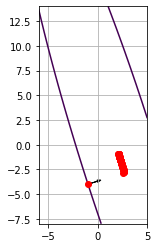

In [67]:
fig, ax = plt.subplots()


theta0 = np.array([-1, -4])
gtheta0 = g([theta0[0], theta0[1]])
nbpts = 40
maxval = np.inf
t0_space = np.linspace(-6,5,nbpts)
t1_space = np.linspace(-8,14,nbpts)
T0, T1 = np.meshgrid(t0_space, t1_space)
Z = [[min(maxval,g([t0, t1])) for t0 in t0_space] for t1 in t1_space]
levels = [gtheta0]
contours = plt.contour(T0, T1, Z, levels)
ax.plot([theta0[0]], [theta0[1]], 'ro')
plt.grid()
plt.gca().set_aspect('equal')

des = -grad(theta0)[::-1]
des /= np.linalg.norm(des)
plt.arrow(theta0[0], theta0[1], des[1], des[0], head_width=0.25)
for i in range(N):
    plt.plot(thetas[i][0],thetas[i][1], 'ro')

In [33]:
np.random.seed(0)
def true_f(x):
    return 2 * x * np.sin(x)

N = 20
a = 0#-np.pi/2
b = 3*np.pi/2
Xs = (b-a) * np.random.rand(N) + a
Ys = np.array([true_f(x) + np.random.randn() for x in Xs])

theta0 = [0, 0]

ftest = lambda x : flin(x, theta0[0], theta0[1])
#g1(theta0[0], theta0[1])

grad([0, 0], Xs, Ys)


array([12.74184431,  2.13893348])

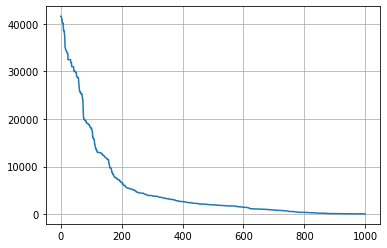

In [34]:
#Stratégie d'évolution

def G1(theta):
    ftest = lambda x : flin(x, theta[1], theta[0])
    return erreur_quad(ftest, Xs, Ys)

errors = []
theta = np.array([200, 1])
sigma = 1
errors.append(G1(theta))

for i in range(1000):
    theta2 = theta + sigma * np.random.randn(2)
    if(G1(theta) > G1(theta2)):
        theta = theta2
    else:
        sigma = sigma ** -1/4
    errors.append(G1(theta))

plt.plot(range(len(errors)), errors)
plt.grid()

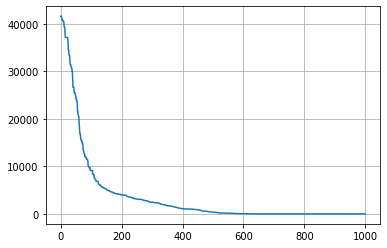

In [35]:
#Stratégie d'évolution

def G1(theta):
    ftest = lambda x : flin(x, theta[1], theta[0])
    return erreur_quad(ftest, Xs, Ys)

errors = []
theta = np.array([200, 1])

errors.append(G1(theta))

for i in range(1000):
    theta2 = theta + np.random.randn(2)
    if(G1(theta) > G1(theta2)):
        theta = theta2
    errors.append(G1(theta))

plt.plot(range(len(errors)), errors)
plt.grid()

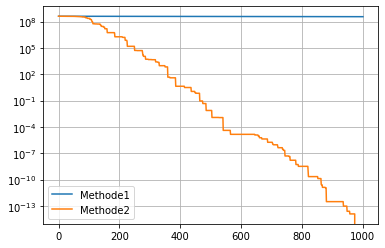

In [36]:
#Stratégie d'évolution

def G1(theta):
    ftest = lambda x : flin(x, theta[1], theta[0])
    return erreur_quad(ftest, Xs, Ys)

errors1 = []
theta1 = np.array([20000, 1])
errors2 = []
theta2 = np.array([20000, 1])

sigmas = []
sigma = 1
sigmas.append(sigma)

gamma = 1.2

errors1.append(G1(theta1))
errors2.append(G1(theta2))

theta1opt = np.sum([(Xs[i] - xbar) * (Ys[i] - ybar) for i in range(len(Xs))])
theta1opt /= np.sum([(x - xbar)**2 for x in Xs])
theta0opt = ybar - theta1opt * xbar
erreuropt = G1([theta0opt, theta1opt])

for i in range(1000):
    theta3 = theta1 + np.random.randn(2)
    theta4 = theta2 + sigma * np.random.randn(2)
    if(G1(theta1) > G1(theta3)):
        theta1 = theta3
    if(G1(theta2) > G1(theta4)):
        theta2 = theta4
        sigma = sigma * gamma
    else:
        sigma = sigma * (gamma ** (-1/4))
    sigmas.append(sigma)
    errors1.append(G1(theta1) - erreuropt)
    errors2.append(G1(theta2) - erreuropt)
    
plt.semilogy(range(len(errors1)), errors1, label="Methode1")
plt.semilogy(range(len(errors2)), errors2, label="Methode2")
plt.yscale('log')
plt.legend()
plt.grid()

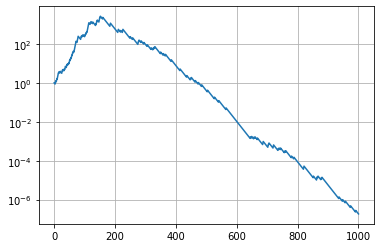

In [37]:
plt.semilogy(range(len(sigmas)), sigmas)
plt.grid()